In [66]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy import stats

In [67]:
#Read CSV
merge_output = pd.read_csv("./zillow_census_m_OUTPUT.csv")


In [68]:
#Fill NaN with 0 (NaN values are for international migration. We are only interested in domestic migration)
merge_output = merge_output.fillna(0)

In [69]:
#Split County into two County and State columns
county_split = merge_output["County"].str.split(pat=', ', expand=True)
merge_output["State"] = county_split[1]
#filter for certain states
merge_output.set_index("County")

######SELECT STATES HERE#####
state_list = ['Florida', 'Georgia', 'North Carolina', 'Arizona', 'Colorado']
merge_output = merge_output[merge_output["State"].isin(state_list)]

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2015 Difference,2016 Difference,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State
3,3,"Adams County, Colorado",72717.0,10843.0,140486885,2728,341,36404.0,4927.0,69792974.0,...,35500,31700.0,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado
16,16,"Alamosa County, Colorado",2958.0,701.0,767550,408,153,991.0,-205.0,375625.0,...,8200,14100.0,-4.627249,-0.269542,5.405405,6.923077,4.236611,6.288344,10.173160,Colorado
47,47,"Apache County, Arizona",5020.0,-2104.0,4149891,244,61,2532.0,-1055.0,2075340.0,...,5300,14200.0,1.052632,-12.127976,-5.419136,9.489705,0.245298,4.323002,11.102424,Arizona
49,49,"Arapahoe County, Colorado",97687.0,2401.0,327003920,4880,3050,47438.0,1201.0,164542888.0,...,40100,29800.0,-0.747757,-5.524862,10.738969,11.185790,10.449050,15.676310,10.070970,Colorado
51,51,"Archuleta County, Colorado",544.0,-380.0,292296,192,168,122.0,-364.0,145476.0,...,30200,20300.0,-15.807560,-6.448980,2.835951,7.042851,7.134364,11.172771,6.755408,Colorado


In [70]:
#Create column that has net total migration/change in price
net_cols = []
dif_cols = []

years = ['2009','2010', '2011', '2012', '2013', '2014']
for year in years:
    year2 = str(int(year) + 1)

    net_cols.append(f"{year}NET")
    dif_cols.append(f"{year2} Difference")

merge_output["TotalNET"] = merge_output[net_cols].sum(axis=1)
merge_output["Total Difference"] = merge_output[dif_cols].sum(axis=1)

merge_output.head()

,Unnamed: 0,County,2009IN,2009NET,2009POP1YR,state,county,2010IN,2010NET,2010POP1YR,...,2010 Percent Change,2011 Percent Change,2012 Percent Change,2013 Percent Change,2014 Percent Change,2015 Percent Change,2016 Percent Change,State,TotalNET,Total Difference
3,3,"Adams County, Colorado",72717.0,10843.0,140486885,2728,341,36404.0,4927.0,69792974.0,...,-3.395785,-0.606061,8.231707,9.746479,13.911704,15.998197,12.315462,Colorado,37236.0,86600.0
16,16,"Alamosa County, Colorado",2958.0,701.0,767550,408,153,991.0,-205.0,375625.0,...,-4.627249,-0.269542,5.405405,6.923077,4.236611,6.288344,10.173160,Colorado,-517.0,21900.0
47,47,"Apache County, Arizona",5020.0,-2104.0,4149891,244,61,2532.0,-1055.0,2075340.0,...,1.052632,-12.127976,-5.419136,9.489705,0.245298,4.323002,11.102424,Arizona,-11290.0,-5100.0
49,49,"Arapahoe County, Colorado",97687.0,2401.0,327003920,4880,3050,47438.0,1201.0,164542888.0,...,-0.747757,-5.524862,10.738969,11.185790,10.449050,15.676310,10.070970,Colorado,39806.0,95300.0
51,51,"Archuleta County, Colorado",544.0,-380.0,292296,192,168,122.0,-364.0,145476.0,...,-15.807560,-6.448980,2.835951,7.042851,7.134364,11.172771,6.755408,Colorado,-3446.0,9500.0


<Figure size 7200x4800 with 0 Axes>

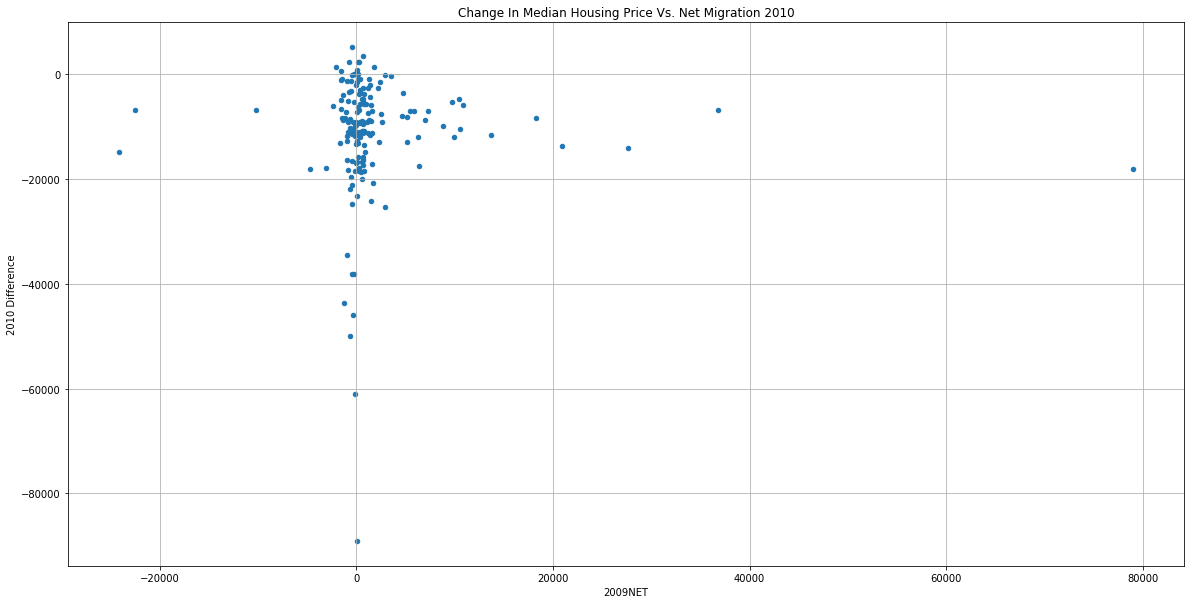

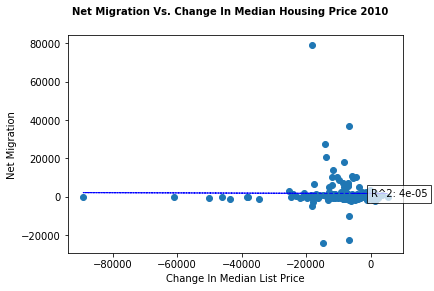

<Figure size 7200x4800 with 0 Axes>

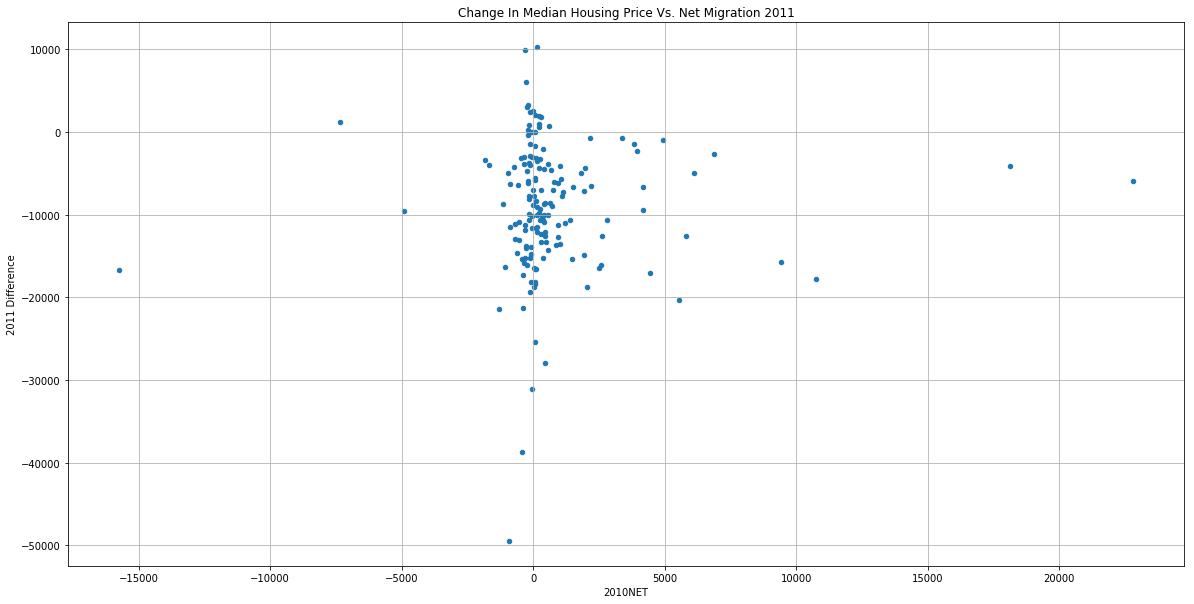

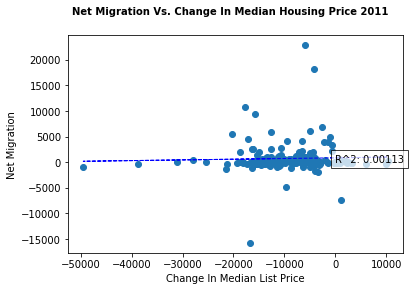

<Figure size 7200x4800 with 0 Axes>

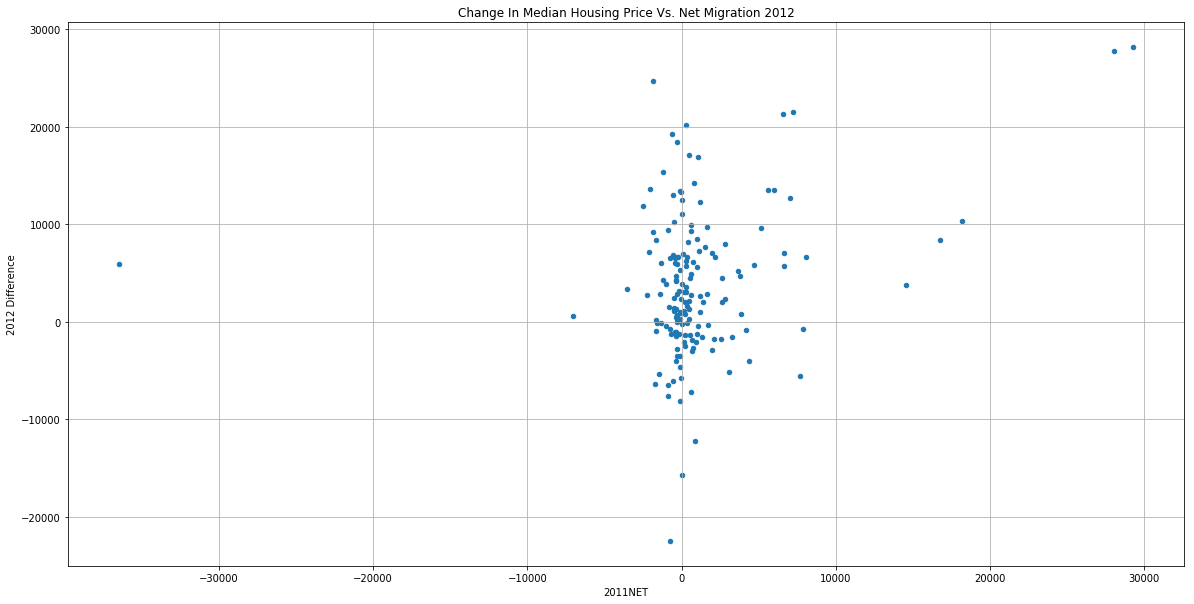

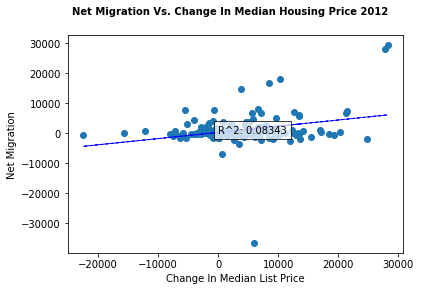

<Figure size 7200x4800 with 0 Axes>

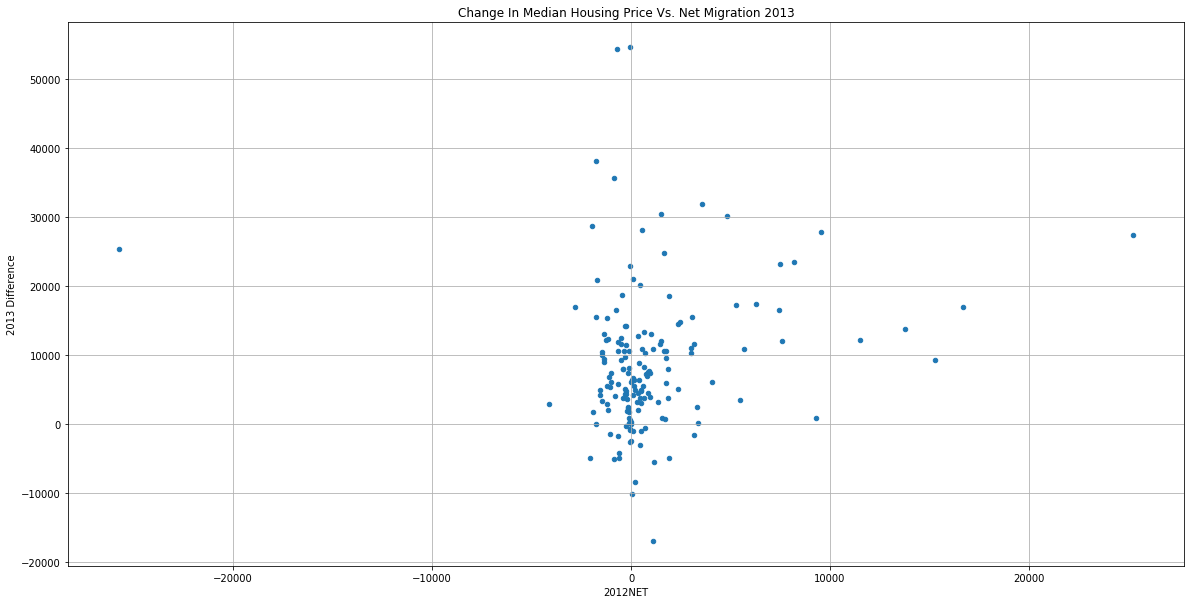

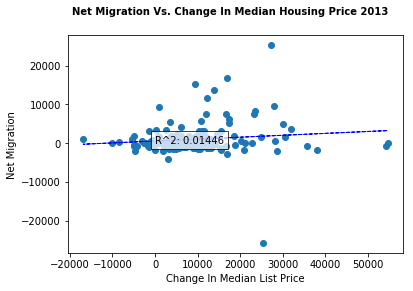

<Figure size 7200x4800 with 0 Axes>

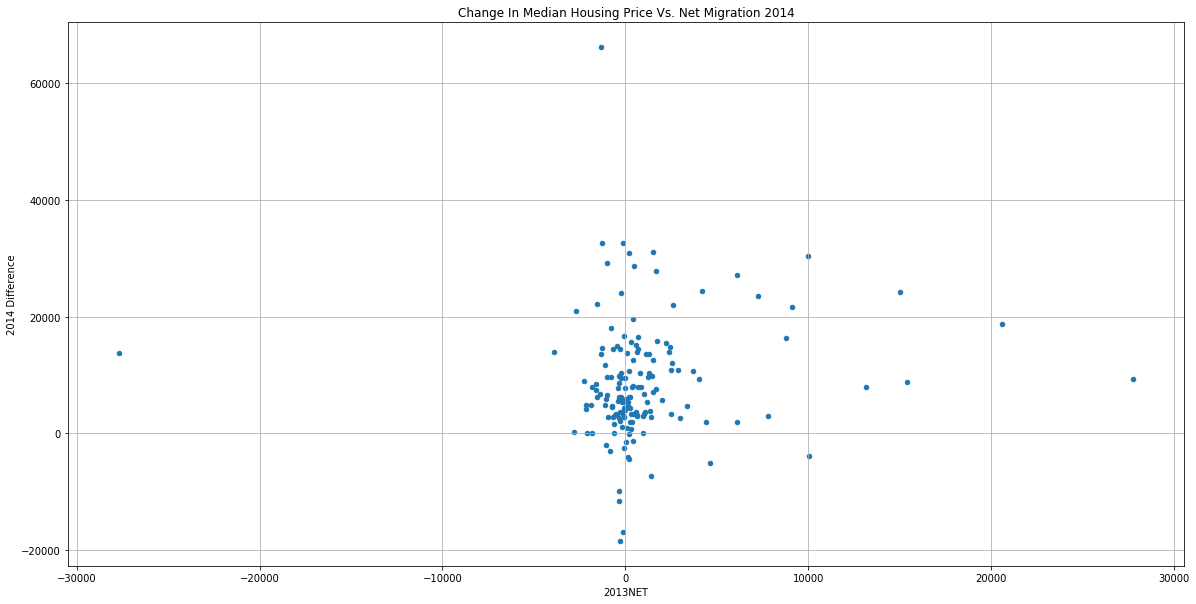

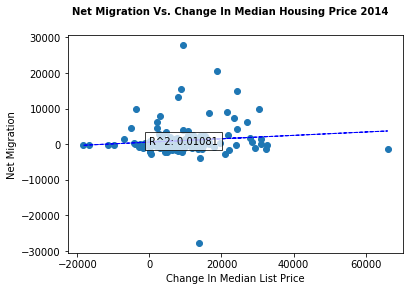

<Figure size 7200x4800 with 0 Axes>

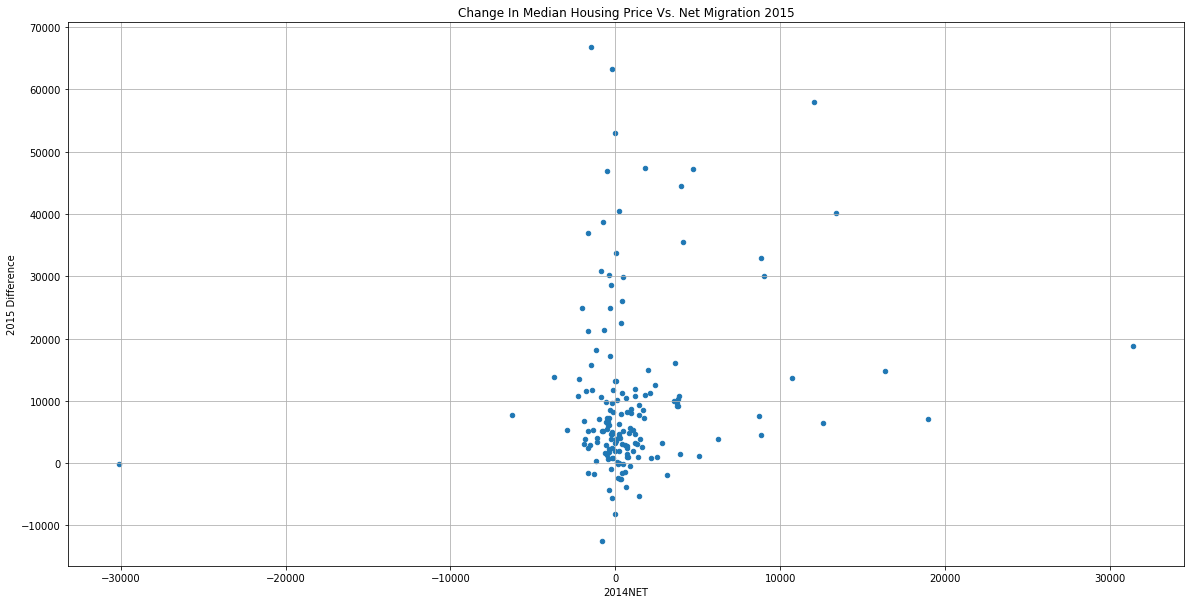

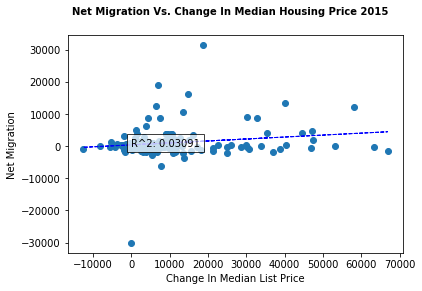

<Figure size 7200x4800 with 0 Axes>

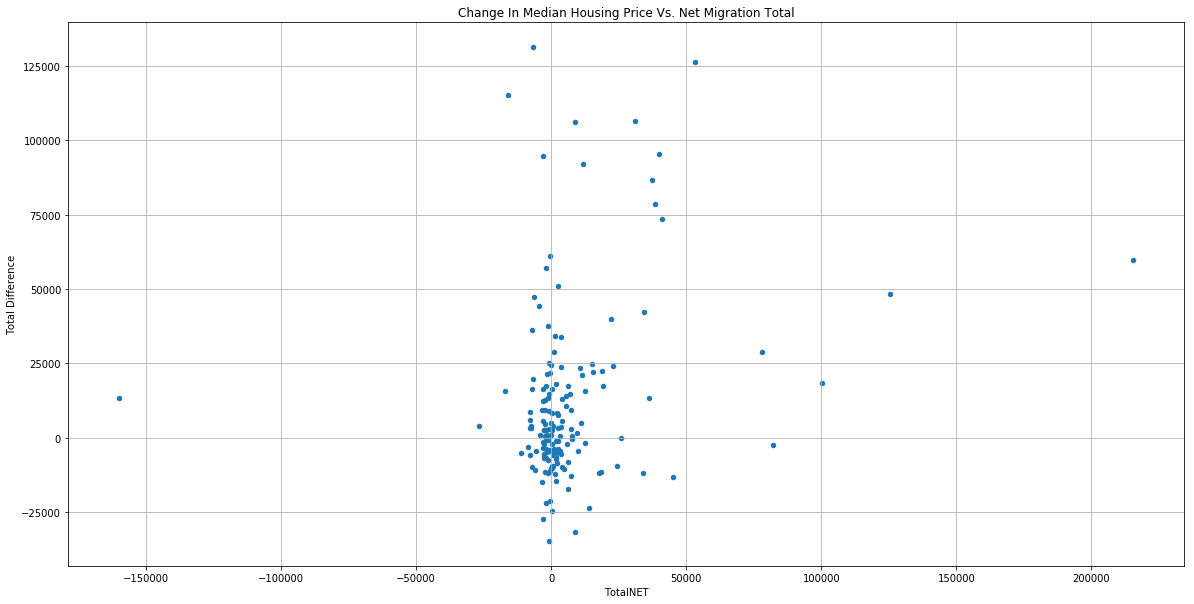

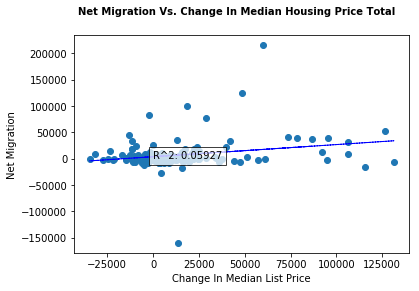

<Figure size 7200x4800 with 0 Axes>

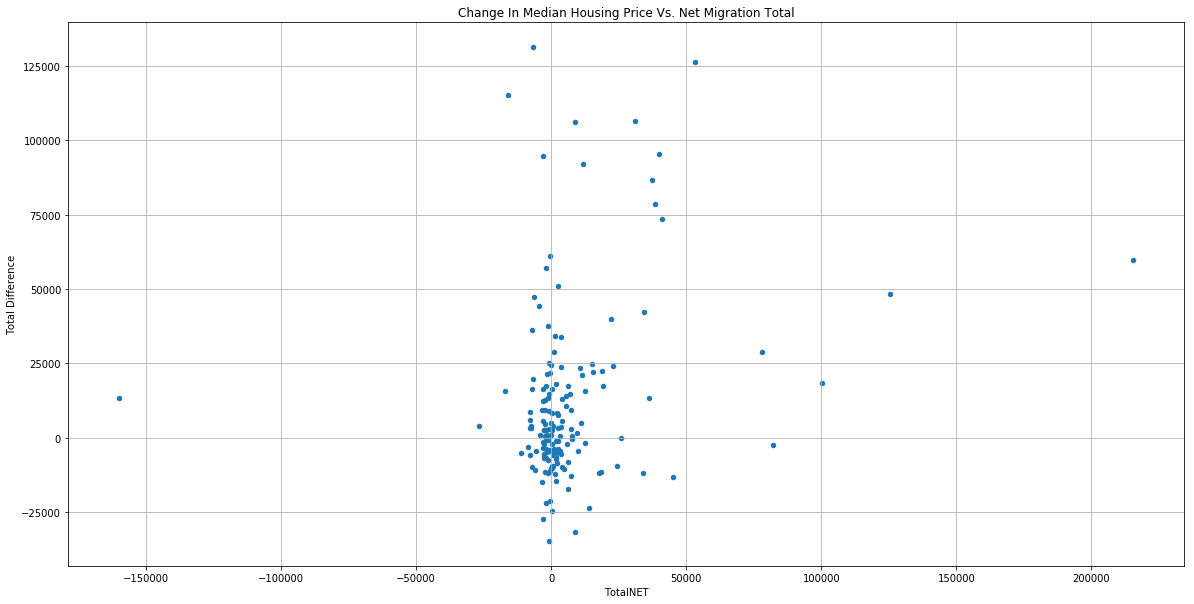

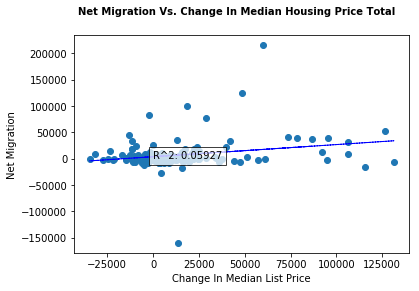

<Figure size 7200x4800 with 0 Axes>

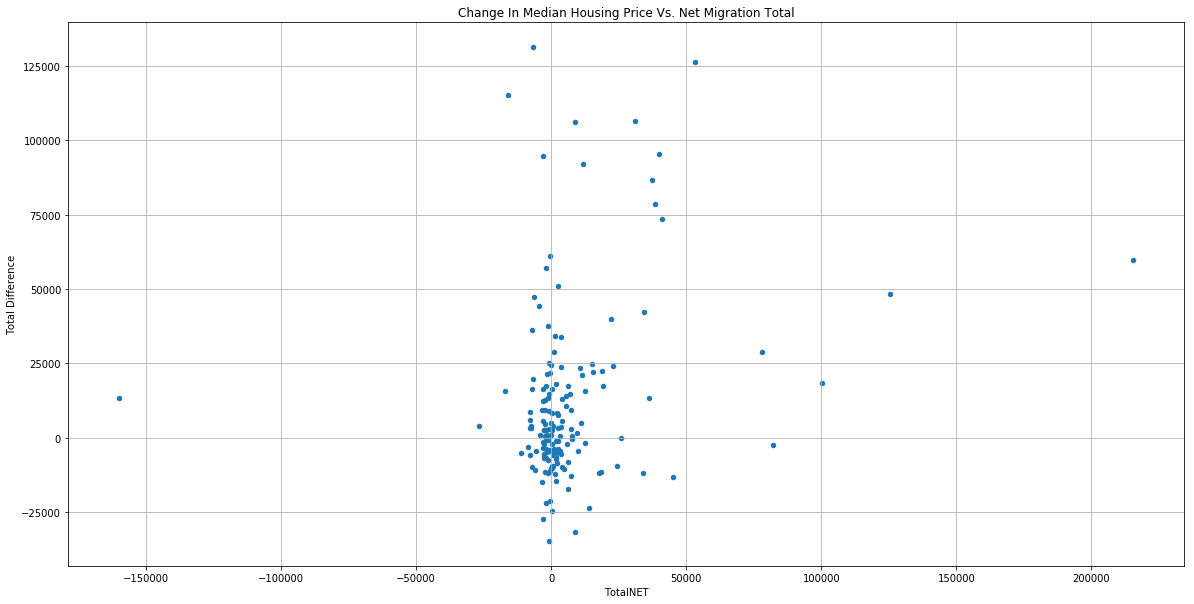

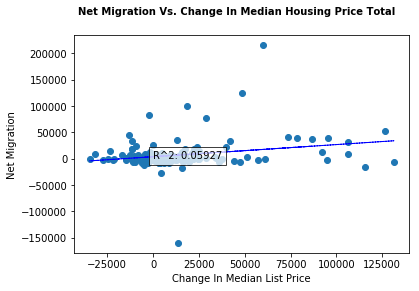

In [73]:
#Scatterplot compares year of census to year+1 of zillow. Also includes total
years.append("Total")


for year in years:
    #added try so we can include total in loop since you can't add 1 to a string, year2 used for zillow
    try:
         year2 = str(int(year) + 1)
    except: year2 = year
        
    plt.figure(dpi=1200)
   
    merge_output.plot(kind="scatter", x=f"{year}NET", 
                                              y=f"{year2} Difference", 
                                              grid=True, figsize=(20,10),
                                              title=f"Change In Median Housing Price Vs. Net Migration {year2}")
    
    difference = merge_output[f"{year2} Difference"]
    moved_net = merge_output[f"{year}NET"]
    
    vc_slope, vc_int, vc_r, vc_p, vc_std_err = stats.linregress(difference, moved_net)
    vc_fit = vc_slope * difference + vc_int

    fig, (ax1) = plt.subplots(1, sharex=True)
    fig.suptitle(f"Net Migration Vs. Change In Median Housing Price {year2}", fontsize=10, fontweight="bold")

    plt.ylabel("Net Migration")
    plt.xlabel("Change In Median List Price")
    #ax1.set_xlim(min(moved_net)-10000, max(moved_net)+10000)
    #ax1.set_ylim(min(difference)-10000, max(difference)+10000)
    ax1.plot(difference, moved_net, linewidth=0, marker="o")
    ax1.plot(difference, vc_fit, "b--", linewidth=1)
    plt.text(-5,-5,"R^2: "+str(round(vc_r**2,5)),bbox=dict(facecolor='white', alpha=0.75))
    
    plt.savefig(f"Census vs Zillow Scatter (SELECT STATES- Net + -PERC CHANGE) {year2}.png",dpi = 1000)
    plt.show()